In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv("poly.csv")
df

,sno,Temperature,Pressure
0,1,0,0.0002
1,2,20,0.0012
2,3,40,0.0060
3,4,60,0.0300
4,5,80,0.0900
5,6,100,0.2700


In [3]:
df.shape

(6, 3)

In [4]:
df.drop(["sno"],inplace=True,axis=1)
df

,Temperature,Pressure
0,0,0.0002
1,20,0.0012
2,40,0.0060
3,60,0.0300
4,80,0.0900
5,100,0.2700


In [5]:
df.dtypes

Temperature      int64
Pressure       float64
dtype: object

In [6]:
x=df.iloc[:,:-1] #[:,1:2]
x.ndim

2

In [7]:
y=df["Pressure"]
y

0    0.0002
1    0.0012
2    0.0060
3    0.0300
4    0.0900
5    0.2700
Name: Pressure, dtype: float64

Text(0.5, 1.0, 'temperature-pressure graph')

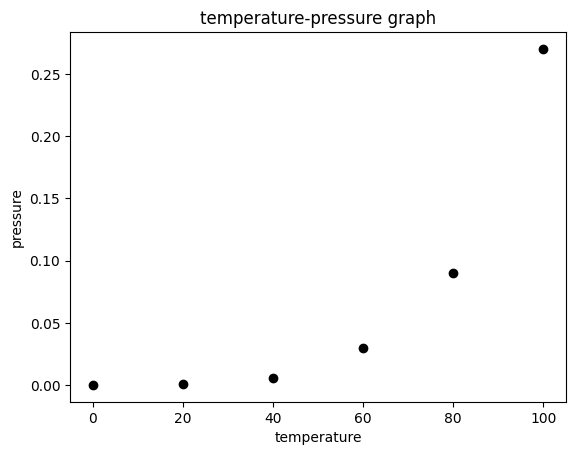

In [8]:
plt.scatter(x,y,color="k")
plt.xlabel("temperature")
plt.ylabel("pressure")
plt.title("temperature-pressure graph")

In [9]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x,y)
y_pred=model.predict(x)
y_pred

array([-0.05086667, -0.00402667,  0.04281333,  0.08965333,  0.13649333,
        0.18333333])

Text(0.5, 1.0, 'regression plot')

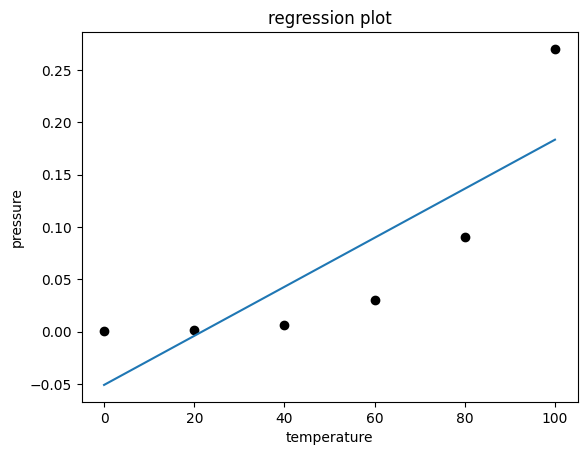

In [10]:
plt.scatter(x,y,color="k")
plt.plot(x,y_pred)
plt.xlabel("temperature")
plt.ylabel("pressure")
plt.title("regression plot")

In [11]:
print("Slope is",model.coef_)

Slope is [0.002342]


In [12]:
print("constant is ",model.intercept_)

constant is  -0.05086666666666667


In [13]:
from sklearn.metrics import mean_absolute_percentage_error,r2_score
mape=mean_absolute_percentage_error(y,y_pred)
mape

44.775078189300416

In [14]:
score=r2_score(y,y_pred)
score

0.690349972603981

In [15]:
#to increase feature to reduce error
from sklearn.preprocessing import PolynomialFeatures
feature=PolynomialFeatures(degree=2) # x==> 3 features
x_feature=feature.fit_transform(x)
x_feature

array([[1.0e+00, 0.0e+00, 0.0e+00],
       [1.0e+00, 2.0e+01, 4.0e+02],
       [1.0e+00, 4.0e+01, 1.6e+03],
       [1.0e+00, 6.0e+01, 3.6e+03],
       [1.0e+00, 8.0e+01, 6.4e+03],
       [1.0e+00, 1.0e+02, 1.0e+04]])

In [16]:
model1=LinearRegression()
model1.fit(x_feature,y)
y_pred1=model1.predict(x_feature)
y_pred1

array([ 0.01555, -0.01731, -0.01032,  0.03652,  0.12321,  0.24975])

In [17]:
mape=mean_absolute_percentage_error(y,y_pred1)
mape

15.926055555557816

In [18]:
score=r2_score(y,y_pred1)
score

0.9568461098911795

Text(0.5, 1.0, 'polynomial regression graph')

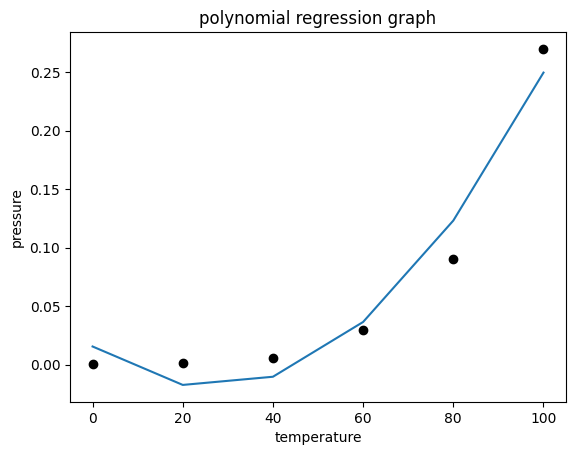

In [19]:
plt.scatter(x,y,color="k")
plt.plot(x,y_pred1)
plt.xlabel("temperature")
plt.ylabel("pressure")
plt.title("polynomial regression graph")

In [20]:
df1=pd.DataFrame({"Actual value":y," Predicted value":y_pred,"Poly predicated value":y_pred1})
df1

,Actual value,Predicted value,Poly predicated value
0,0.0002,-0.050867,0.01555
1,0.0012,-0.004027,-0.01731
2,0.0060,0.042813,-0.01032
3,0.0300,0.089653,0.03652
4,0.0900,0.136493,0.12321
5,0.2700,0.183333,0.24975
